In [1]:
require(data.table)
require(ggplot2)
require(magrittr)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: magrittr



In [2]:
result <- fread("prob-failure.tsv")
result %>% summary

 Delta [slots]   Adversarial Stake [%/100]    Bound           Number of Blocks
 Min.   :0.010   Min.   :0.025             Length:2160        Min.   : 1.00   
 1st Qu.:0.010   1st Qu.:0.075             Class :character   1st Qu.:10.75   
 Median :2.000   Median :0.125             Mode  :character   Median :20.50   
 Mean   :2.337   Mean   :0.125                                Mean   :20.50   
 3rd Qu.:5.000   3rd Qu.:0.175                                3rd Qu.:30.25   
 Max.   :5.000   Max.   :0.225                                Max.   :40.00   
 Probability of Failure
 Min.   :0.0000000     
 1st Qu.:0.0000000     
 Median :0.0000189     
 Mean   :0.0265545     
 3rd Qu.:0.0030620     
 Max.   :0.7454855     

In [3]:
resultPl <- result[,
       .(
           `Delta`=factor(paste0("Δ = ", `Delta [slots]`)),
           `Adversary`=factor(
               paste0(100 * `Adversarial Stake [%/100]`, "% Adversary"),
               levels=c(
                   "2.5% Adversary",
                   "5% Adversary",
                   "7.5% Adversary",
                   "10% Adversary",
                   "12.5% Adversary",
                   "15% Adversary",
                   "17.5% Adversary",
                   "20% Adversary",
                   "22.5% Adversary"
                )
           ),
           `Delta [slots]`,
           `Adversarial Stake [%/100]`,
           `Bound` = factor(ifelse(`Bound` == "UB", "Upper", "Lower"), levels=c("Upper", "Lower")),
           `Number of Blocks`,
           `Probability of Failure`
        )
      ]

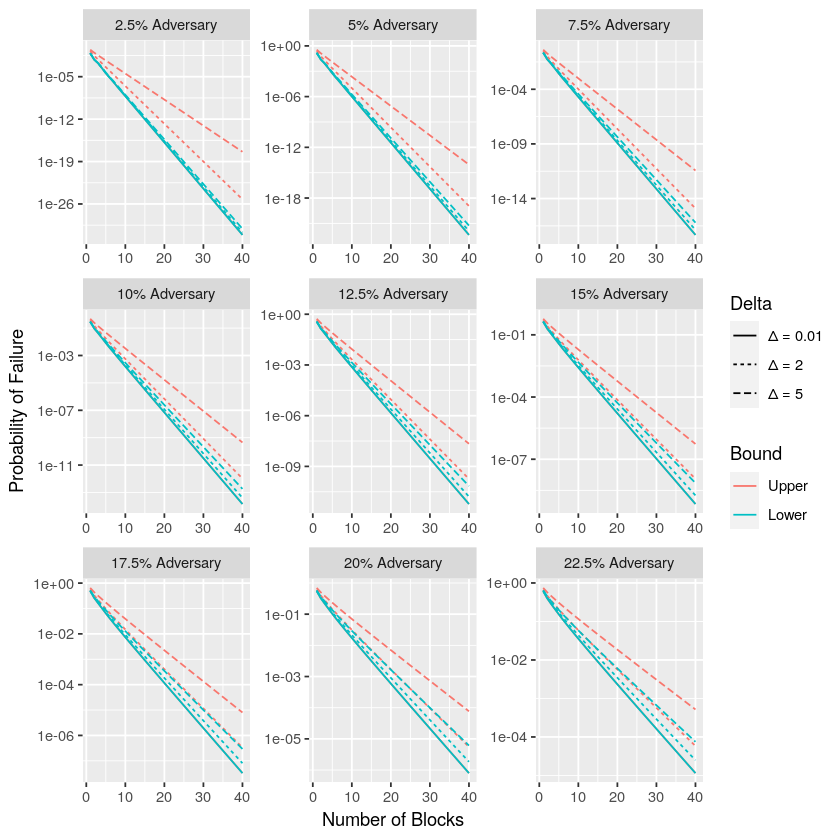

In [4]:
ggplot(resultPl, aes(x=`Number of Blocks`, y=`Probability of Failure`, linetype=`Delta`, color=`Bound`)) +
  geom_line() +
  scale_y_log10() +
  facet_wrap(. ~ `Adversary`, scales="free")

In [5]:
ggsave("LCanalysis.png", width=10, height=7, unit="in", dpi=150)

In [6]:
dcast(
    resultPl[
        `Delta [slots]` == 5 &
        `Adversarial Stake [%/100]` %in% c(0.05, 0.10, 0.15, 0.20) &
        `Bound` == "Upper" &
        `Number of Blocks` %in% c(3,4,5,6,9,12,15,18,21,24,27,30),
        .(
            `Blocks`=`Number of Blocks`,
            `Slots Expected` = 20 * `Number of Blocks`,
            `Adversary`,
            `Probability`=formatC(`Probability of Failure`, format = "e", digits = 2)
        )
    ],
    `Blocks` + `Slots Expected` ~ `Adversary`, value.var="Probability")

Blocks,Slots Expected,5% Adversary,10% Adversary,15% Adversary,20% Adversary
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
3,60,6.13e-02,1.41e-01,2.53e-01,3.89e-01
4,80,2.73e-02,8.15e-02,1.73e-01,3.01e-01
5,100,1.22e-02,4.73e-02,1.19e-01,2.34e-01
6,120,5.46e-03,2.75e-02,8.26e-02,1.83e-01
9,180,4.95e-04,5.55e-03,2.80e-02,8.89e-02
12,240,4.51e-05,1.13e-03,9.65e-03,4.40e-02
15,300,4.11e-06,2.32e-04,3.35e-03,2.20e-02
18,360,3.75e-07,4.77e-05,1.17e-03,1.11e-02
21,420,3.42e-08,9.83e-06,4.11e-04,5.60e-03
